In [1]:
import pickle as pk
import numpy as np
from glob import glob
!ls

awsfiles.txt
calculator.ipynb
Check extracted.ipynb
Combine npz files.ipynb
echo.log
files.txt
Finding cell in window.ipynb
flag
generate Normalized Patches.ipynb
initial exploration, generated window.pkl.ipynb
log
ManageEC2Jobs.ipynb
manage s3 lock files.ipynb
psutil.ipynb
read image and break into tiles-Copy1..ipynb
read image and break into tiles..ipynb
Read Patches from npz.ipynb
test Popen.ipynb
unpack patches.ipynb


In [2]:
data_dir="/dev/shm/data/patches"
!ls -lrt $data_dir/

total 50187380
-rw-rw-r-- 1 ubuntu ubuntu 1447758130 Oct  9 21:42 patches0.npz
-rw-rw-r-- 1 ubuntu ubuntu 1291505818 Oct  9 21:43 patches1.npz
-rw-rw-r-- 1 ubuntu ubuntu 1138911362 Oct  9 21:44 patches2.npz
-rw-rw-r-- 1 ubuntu ubuntu 1084877298 Oct  9 21:44 patches3.npz
-rw-rw-r-- 1 ubuntu ubuntu 1200516650 Oct  9 21:45 patches4.npz
-rw-rw-r-- 1 ubuntu ubuntu 1220419690 Oct  9 21:45 patches5.npz
-rw-rw-r-- 1 ubuntu ubuntu 1128785018 Oct  9 21:46 patches6.npz
-rw-rw-r-- 1 ubuntu ubuntu 1534161530 Oct  9 21:47 patches7.npz
-rw-rw-r-- 1 ubuntu ubuntu 1261879874 Oct  9 21:48 patches8.npz
-rw-rw-r-- 1 ubuntu ubuntu 1272732410 Oct  9 21:48 patches9.npz
-rw-rw-r-- 1 ubuntu ubuntu 1380666058 Oct  9 21:49 patches10.npz
-rw-rw-r-- 1 ubuntu ubuntu 1285171810 Oct  9 21:50 patches11.npz
-rw-rw-r-- 1 ubuntu ubuntu 1492741690 Oct  9 21:50 patches12.npz
-rw-rw-r-- 1 ubuntu ubuntu 1504670066 Oct  9 21:51 patches13.npz
-rw-rw-r-- 1 ubuntu ubuntu 1402008034 Oct  9 21:52 patches14.npz
-rw-rw-r-- 1 ubuntu 

In [3]:
patches=[]
for file in glob(data_dir+'/patches*.npz'):
    print(file)
    content=np.load(file)
    patches.append(content['Vout'])

/dev/shm/data/patches/patches9.npz
/dev/shm/data/patches/patches7.npz
/dev/shm/data/patches/patches8.npz
/dev/shm/data/patches/patches5.npz
/dev/shm/data/patches/patches4.npz
/dev/shm/data/patches/patches35.npz
/dev/shm/data/patches/patches34.npz
/dev/shm/data/patches/patches33.npz
/dev/shm/data/patches/patches32.npz
/dev/shm/data/patches/patches31.npz
/dev/shm/data/patches/patches30.npz
/dev/shm/data/patches/patches29.npz
/dev/shm/data/patches/patches28.npz
/dev/shm/data/patches/patches27.npz
/dev/shm/data/patches/patches3.npz
/dev/shm/data/patches/patches25.npz
/dev/shm/data/patches/patches26.npz
/dev/shm/data/patches/patches20.npz
/dev/shm/data/patches/patches23.npz
/dev/shm/data/patches/patches24.npz
/dev/shm/data/patches/patches22.npz
/dev/shm/data/patches/patches21.npz
/dev/shm/data/patches/patches19.npz
/dev/shm/data/patches/patches18.npz
/dev/shm/data/patches/patches2.npz
/dev/shm/data/patches/patches17.npz
/dev/shm/data/patches/patches15.npz
/dev/shm/data/patches/patches13.npz

In [5]:
combined=np.concatenate(patches[:10])
combined.size/1000000.

1501.845744

In [6]:
combined.shape


(893424, 41, 41)

In [7]:
shuffle=np.random.permutation(combined.shape[0])

In [8]:
scombined=combined[shuffle,:,:]

In [9]:
scombined.shape

(893424, 41, 41)

In [10]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/ubuntu/.local/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['shuffle']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [14]:
import matplotlib.pyplot as plt
from astropy.convolution import Gaussian2DKernel,convolve
gaussian_1 = Gaussian2DKernel(1,x_size=7,y_size=7)
factor_1=sum(gaussian_1)
gaussian_2 = Gaussian2DKernel(2,x_size=7,y_size=7)
factor_2=sum(gaussian_2)
print(factor_1,factor_2)
def calc_err(pic):
    P1=convolve(pic,gaussian_1)/factor_1
    #P2=convolve(pic,gaussian_2)/factor_2
    error=sqrt(mean(abs(pic-P1)))
    sub=P1[::2,::2]
    return error,sub

0.9994587918263369 0.8519747576933969


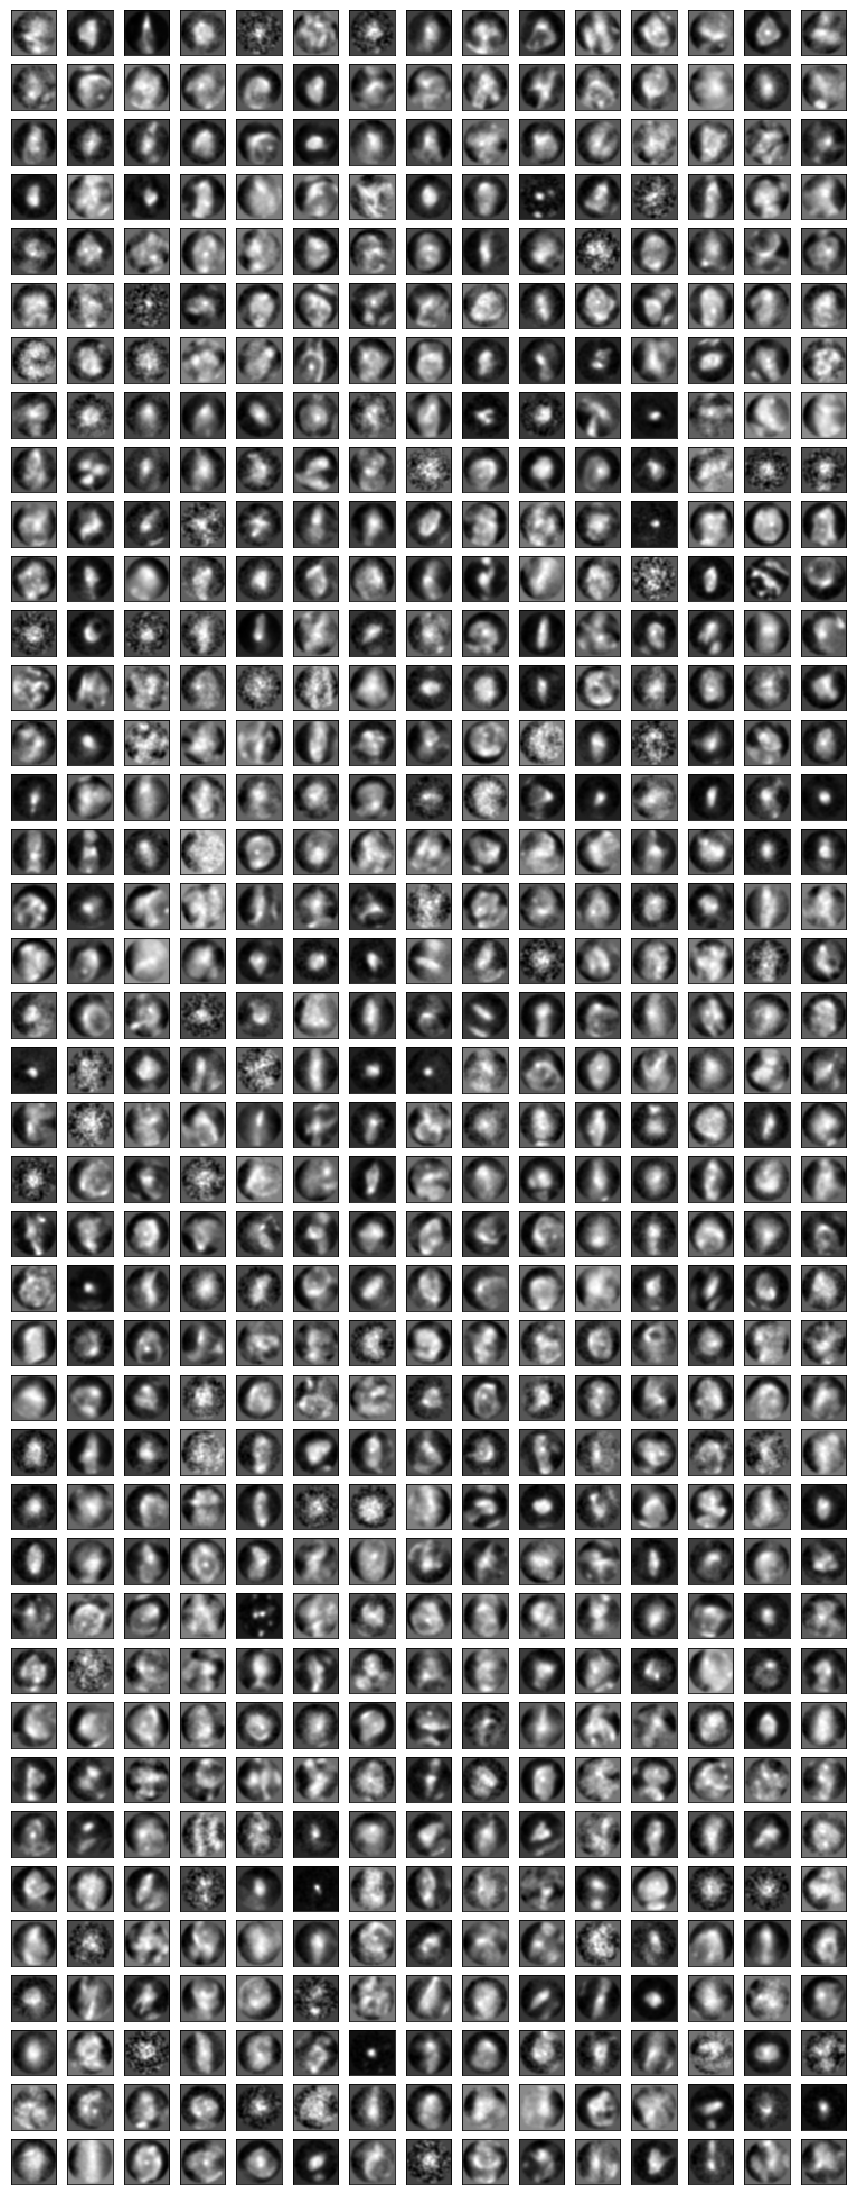

In [15]:
h=40
w=15
shift=1000
figure(figsize=(w,h))
for i in range(h*w):
    subplot(h,w,i+1);
    pic=scombined[shift+i,:,:]
    P=convolve(pic,gaussian_1)/factor_1

    fig=imshow(P,cmap='gray')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)

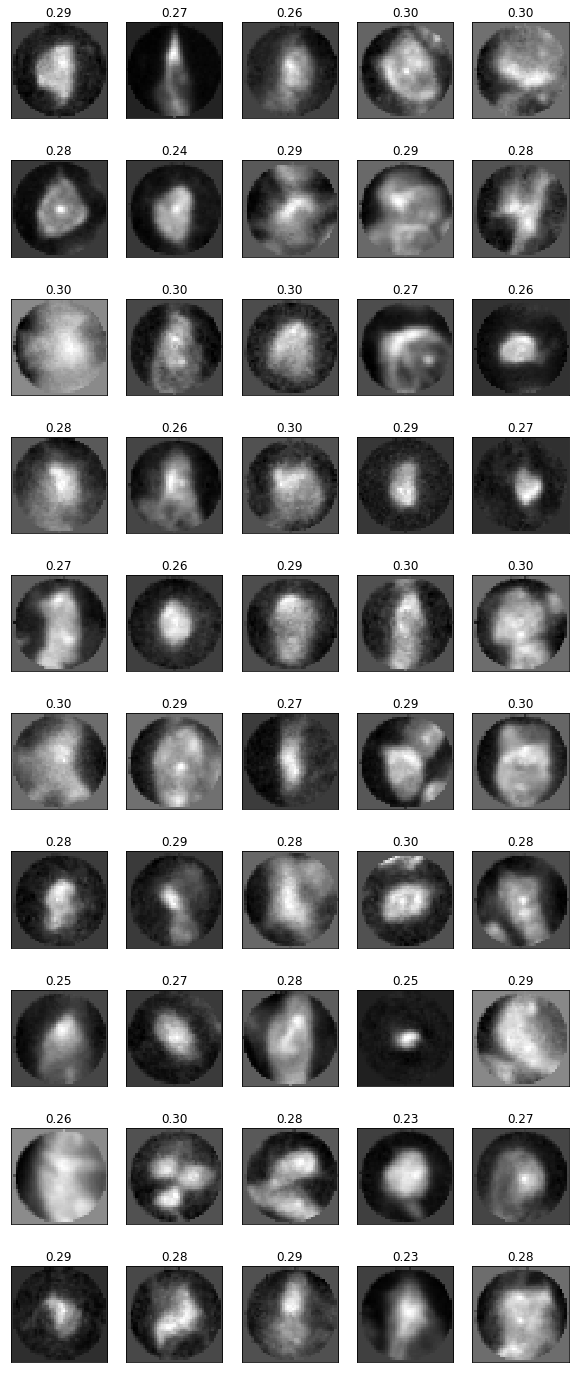

In [23]:
h=10
w=5
shift=1000
figure(figsize=(2*w,2.5*h))

i=0; j=0;
while j < h*w:
    pic=scombined[i+shift,:,:]
    i+=1
    error,sub=calc_err(pic)
    if error>0.3:
        continue
    subplot(h,w,j+1);
    j+=1
    fig=imshow(pic,cmap='gray')
    plt.title('%4.2f'%error);
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)

In [24]:
low_err=[]
i=0
while len(low_err) <10000:
    pic=scombined[i+shift,:,:]
    i+=1
    error,sub=calc_err(pic)
    if error<0.3:
        low_err.append(sub)
        j=len(low_err)
        if j%1000==0:
            print('\r',i,j,end='')

 26613 10000

In [25]:
lcombined=np.stack(low_err)

In [26]:
lcombined.shape

(10000, 21, 21)

In [41]:
def dist2(a,b):
    diff=(a-b)**2
    return sum(diff.flatten())

In [42]:
D=[]
for i in range(1,lcombined.shape[0]):
    D.append(dist2(lcombined[i,:,:],lcombined[i-1,:,:]))
    if i%1000==0:
        print('\r',i,end='')

 9000

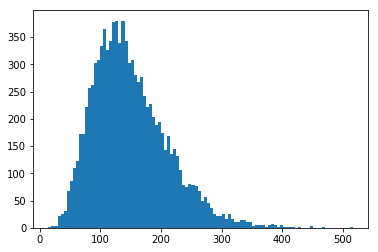

In [43]:
hist(D,bins=100);

In [44]:
max(D)

516.4893306428228

In [45]:
lcombined.shape

(10000, 21, 21)

 i=       405,  #reps=        60  Prob=0.097740

 i=       590,  #reps=        79  Prob=0.148988

 i=      9999,  #reps=       914  Prob=0.072281

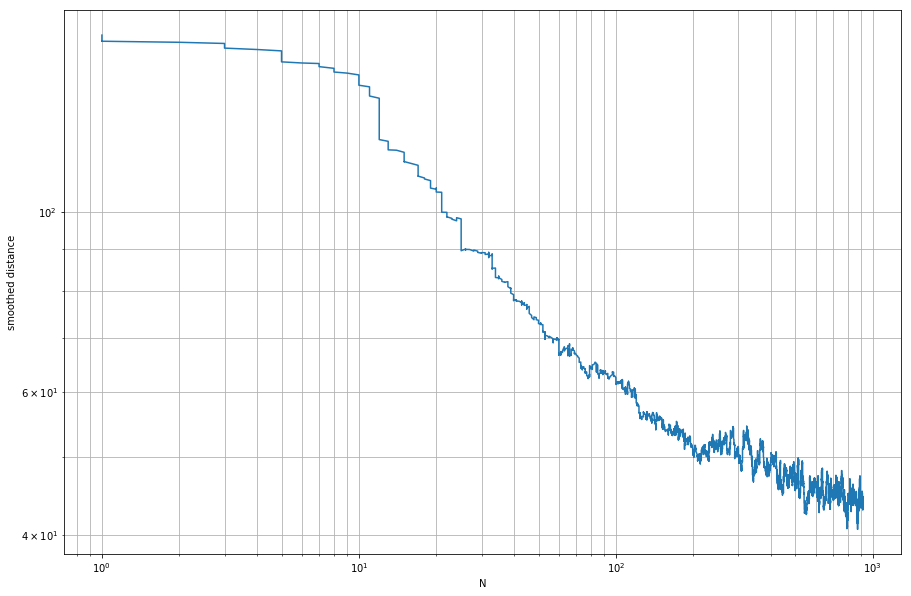

In [51]:
Reps=[lcombined[0,:,:]]

scale=550.
Statistics=[]
for i in range(1,lcombined.shape[0]): #scombined.shape[0]):
    _min=100000
    patch=lcombined[i,:,:]
    for r in Reps:
        _min=min(_min,dist2(patch,r))
    Prob=_min/scale
    print('\r','i=%10d,  #reps=%10d  Prob=%8.6f'%(i,len(Reps),Prob),end='')
    Statistics.append((i,len(Reps),_min))
    if np.random.rand()<Prob:
        Reps.append(patch)

N=[x[1] for x in Statistics]
d=[x[2] for x in Statistics]

alpha=0.01
s=d[0]
smoothed=[s]
for x in d[1:]:
    s=(1-alpha)*s + alpha*x
    smoothed.append(s)

figure(figsize=[15,10])
loglog(N,smoothed)
xlabel('N')
ylabel('smoothed distance')
grid(which='both')

In [52]:
def calc_d(n1,n2,epsilon_1,epsilon_2):
    return log(n1/n2)/log(epsilon_2/epsilon_1)
calc_d(100,10,50,150)

2.095903274289385

In [55]:
calc_d(1000,100,43,50)

15.266814586606234

In [ ]:
len(Reps)

In [53]:
smoothed[:5]

[165.1844374823975,
 164.4541593503572,
 163.86500948694376,
 164.61474213130955,
 163.64668399739517]

In [ ]:
h=40
w=15
shift=0
figure(figsize=(w,h))
for i in range(w*h):
    subplot(h,w,i+1);
    fig=imshow(Reps[i],cmap='gray')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)